In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn


# 导入数据

In [2]:
columns=['user_id','order_dt','order_products','order_amount']

In [3]:
df=pd.read_table('C:\Program Files\CDNOW.txt',names=columns,sep='\s+')

# 检查数据

In [4]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [5]:
df.info() #不含有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [6]:
df.order_dt=pd.to_datetime(df.order_dt,format='%Y%m%d')

# 商品销售静态分析

In [7]:
df.describe()

,user_id,order_products,order_amount
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


订单购买数量分析：
用户平均每笔购买数量为2.4，中位数为2，最大值达到99

订单购买金额分析：


# 商品销售动态分析

In [8]:
# 订单数量趋势分析

In [9]:
# 订单金额趋势分析

In [10]:
df2=df.copy()
df2['order_dt']=pd.to_datetime(df['order_dt'],format='%Y%m%d')
df2['month']=df2['order_dt'].values.astype('datetime64[M]')

df2.groupby('month')[['order_products','order_amount']].sum()

,order_products,order_amount
month,,
1997-01-01,19416,299060.17
1997-02-01,24921,379590.03
1997-03-01,26159,393155.27
1997-04-01,9729,142824.49
1997-05-01,7275,107933.30
1997-06-01,7301,108395.87
1997-07-01,8131,122078.88
1997-08-01,5851,88367.69
1997-09-01,5729,81948.80


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000207CBEA7908>,
      dtype=object)

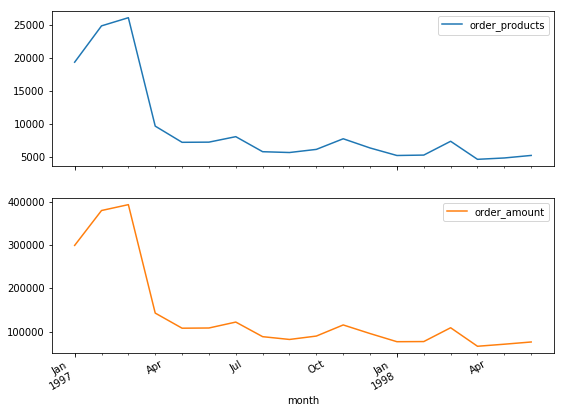

In [11]:
df2.groupby('month')[['order_products','order_amount']].sum().plot(kind='line',subplots=True,figsize=(9,7))

消费金额和销量在1-4月较高，随后趋于平稳

In [12]:
# 异常值检测

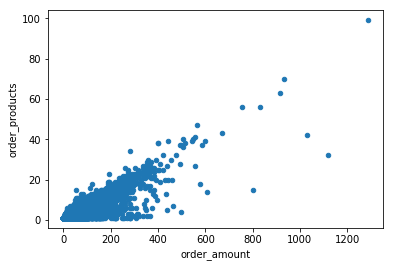

In [13]:
df.plot.scatter(x='order_amount',y='order_products')

# 用户消费行为静态分析

In [14]:
# 用户购买数量分析

In [15]:
# 用户购买金额分析

In [16]:
df.groupby('user_id').sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


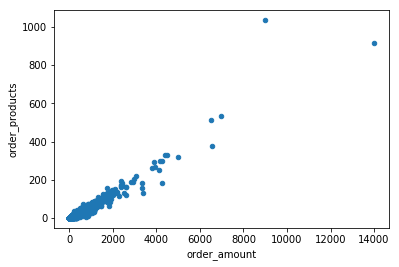

In [17]:
df.groupby('user_id').sum().plot.scatter(x='order_amount',y='order_products')

Text(0.5,1,'order_products')

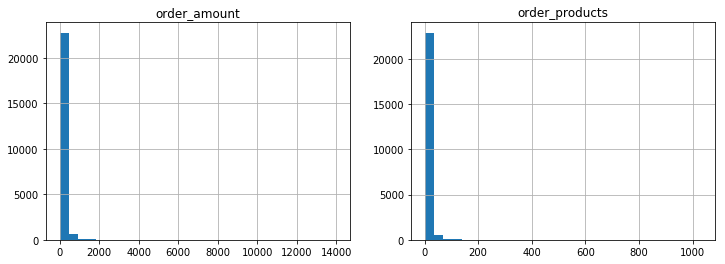

In [18]:
plt.figure(figsize=(12,4))
plt.subplot(121)
df.groupby('user_id')['order_amount'].sum().hist(bins=30)
plt.title('order_amount')
plt.subplot(122)
df.groupby('user_id')['order_products'].sum().hist(bins=30)
plt.title('order_products')

用户购买数量均值7件，中位数为3件，最大值为1033件。

In [19]:
# 用户购买次数分析

In [20]:
df2.groupby('user_id')['order_products'].count().describe()

count    23570.000000
mean         2.955409
std          4.736558
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        217.000000
Name: order_products, dtype: float64

用户平均购买次数为2.95次，最大购买次数为217

# 用户行为动态分析

In [21]:
# 用户首次购买时间和最后消费时间

In [22]:
df2.groupby('user_id')['month'].min().value_counts()# 用户首次购买时间

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [23]:
df2.groupby('user_id')['month'].max().value_counts()# 用户最后消费时间

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

可以看出，用户首次购买多集中在1997年1-3月

In [24]:
# 用户生命周期分析 第一次消费至最后一次消费时间之差

In [25]:
user_purchase=df[['user_id','order_products','order_amount','order_dt']]

In [26]:
order_date_min=user_purchase.groupby('user_id').order_dt.min()
order_date_max=user_purchase.groupby('user_id').order_dt.max()

In [27]:
(order_date_max-order_date_min).head()

user_id
1     0 days
2     0 days
3   511 days
4   345 days
5   367 days
Name: order_dt, dtype: timedelta64[ns]

In [28]:
(order_date_max-order_date_min).describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
Name: order_dt, dtype: object

In [29]:
(order_date_max-order_date_min).mean()
# 平均生命周期134天

Timedelta('134 days 20:55:36.987696')

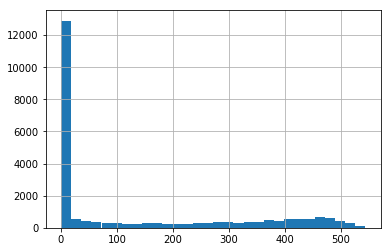

In [30]:
((order_date_max-order_date_min)/np.timedelta64(1,'D')).hist(bins=30)

In [31]:
life_time=(order_date_max-order_date_min).reset_index()

In [32]:
life_time.head()

,user_id,order_dt
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


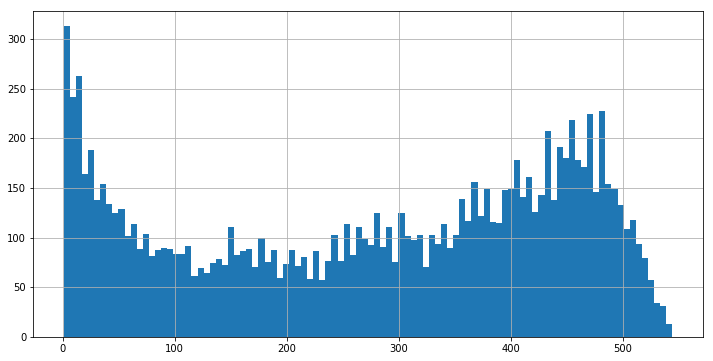

In [33]:
life_time['life_time']=life_time.order_dt/np.timedelta64(1,'D')
life_time[life_time.life_time>0].life_time.hist(bins=100,figsize=(12,6))

In [34]:
life_time[life_time.life_time>0].life_time.mean()

276.0448072247308

In [35]:
# 复购率

In [36]:
pivoted_count=df2.pivot_table(index='user_id',columns='month',values='order_dt',aggfunc='count').fillna(0)

In [37]:
pivoted_count.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [38]:
columns_month=df2.month.sort_values().astype('str').unique()

In [39]:
pivoted_count.columns=columns_month

In [40]:
pivoted_count.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [41]:
pivoted_counts_transf=pivoted_count.applymap(lambda x : 1 if x>1 else np.NaN if x==0 else 0)

In [42]:
pivoted_counts_transf.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


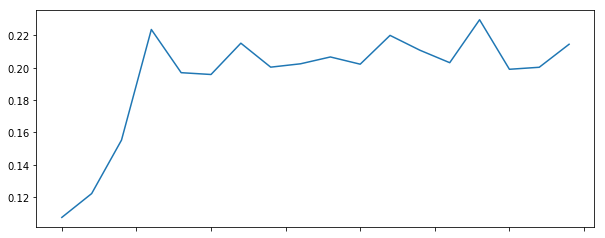

In [43]:
(pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(figsize=(10,4))

In [44]:
# 回购率

In [45]:
pivoted_amount=df2.pivot_table(index='user_id',columns='month',values='order_amount',aggfunc='mean').fillna(0)

In [48]:
columns_month=df2.month.sort_values().astype('str').unique()
pivoted_amount.columns=columns_month

In [49]:
pivoted_amount.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [50]:
pivoted_purchase=pivoted_amount.applymap(lambda x : 1 if x>0 else 0)

In [51]:
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [52]:
def purchase_return(data):
    status=[]
    for i in range(17):
        if data[i]==1:
            if data[1+i]==1:
                status.append(1)
            if data[i+1]==0:
                status.append(0)
        else:
            status.append(np.NAN)
    status.append(np.NAN)
    return pd.Series(status,index=columns_month)

In [53]:
pivoted_purchase_return=pivoted_purchase.apply(purchase_return,axis=1)
pivoted_purchase_return.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


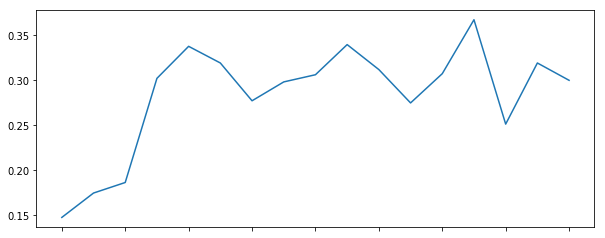

In [54]:
(pivoted_purchase_return.sum()/pivoted_purchase_return.count()).plot(figsize=(10,4))

Text(0.5,1,'pivoted_purchase_return')

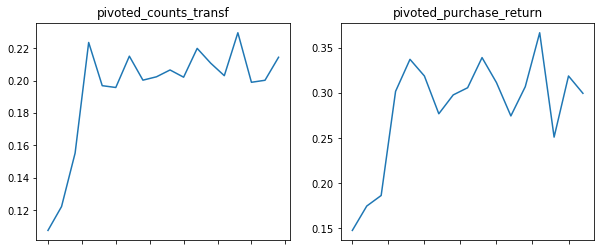

In [57]:
plt.figure()

plt.subplot(121)
(pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(figsize=(10,4))
plt.title('pivoted_counts_transf')
plt.subplot(122)
(pivoted_purchase_return.sum()/pivoted_purchase_return.count()).plot(figsize=(10,4))
plt.title('pivoted_purchase_return')

回购率高于复购率